# Image Avergaing for Noise Removal

#### Image averaging is a common technique used for noise cancellation in digital images. It involves taking multiple images of the same scene and averaging their pixel values to reduce random noise and improve the overall image quality. Here's how the process works:

1. Capture Multiple Images (We will generate images synthetically)
2. Align the Images (We will not do it)
3. Pixel-wise Averaging
4. Repeat for All Pixels

### Capture Multiple Images

As we do not have hundreds of images for the same subject, we will generate noisy images synthetically.
- We will load an image into the memory
- Add noise to this image
- Generate 100 images similarly

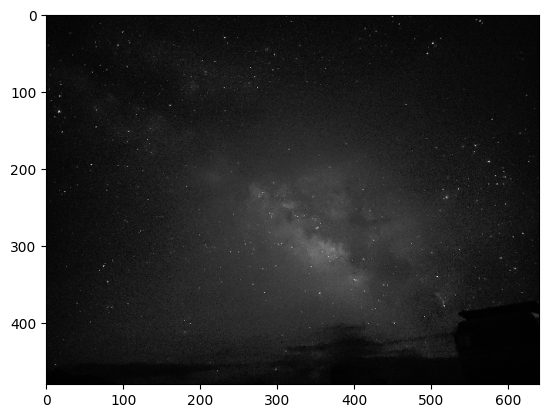

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read Image
img = cv2.imread("C:/Users/ajape/SOI_DIP/ImageFundamentals/milkyway_ladakh.jpg")

# Convert image into greyscale
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey_img = cv2.resize(grey_img, (640, 480))

plt.set_cmap('gray')
plt.imshow(grey_img)

In [3]:
# Create a Noise generation function
def add_noise(image, noise_type='gaussian', mean=0, std_dev=10):
    """
    Add random noise to an image.

    Parameters:
    image (numpy.ndarray): Input image.
    noise_type (str): Type of noise to add ('gaussian', 'salt', 'pepper', 'speckle').
    mean (float): Mean value for Gaussian noise.
    std_dev (float): Standard deviation for Gaussian noise.

    Returns:
    numpy.ndarray: Noisy image.
    """
    noisy_image = np.copy(image)

    if noise_type == 'gaussian':
        noise = np.random.normal(mean, std_dev, noisy_image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
    elif noise_type == 'salt':
        num_pixels = int(0.01 * noisy_image.size)
        coords = [np.random.randint(0, i - 1, int(num_pixels / 2)) for i in noisy_image.shape]
        noisy_image[tuple(coords)] = 255
    elif noise_type == 'pepper':
        num_pixels = int(0.01 * noisy_image.size)
        coords = [np.random.randint(0, i - 1, int(num_pixels / 2)) for i in noisy_image.shape]
        noisy_image[tuple(coords)] = 0
    elif noise_type == 'speckle':
        noise = np.random.normal(mean, std_dev, noisy_image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, image * noise)

    return noisy_image

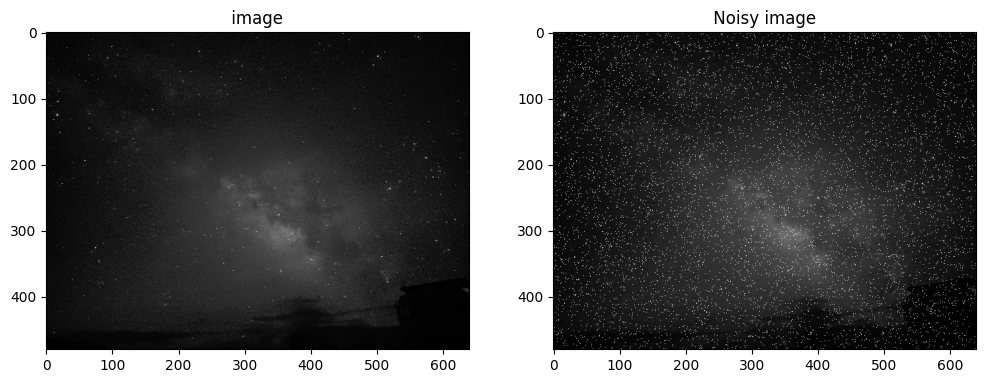

In [6]:
# Test the function of one image
# Add Gaussian noise with mean 0 and standard deviation 10
noisy_image = add_noise(grey_img, noise_type='gaussian', mean=0, std_dev=0.5)

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
fig.add_subplot(121)
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(grey_img)

# show original image on a subplot
fig.add_subplot(122)
plt.title(' Noisy image ')
plt.set_cmap('gray')
plt.imshow(noisy_image)

In [14]:
# Now generate 10 images using this process
n = 10
noisy_images = np.zeros((n, 480, 640), dtype="uint8")
for i in range(n):
    noisy_images[i, :, :] = add_noise(grey_img, noise_type='gaussian', mean=0, std_dev=0.5) 

### Compute Average Image

Now we will compute the pixel average of the noisy images, it will cancel out the noise if the noise is having zero mean

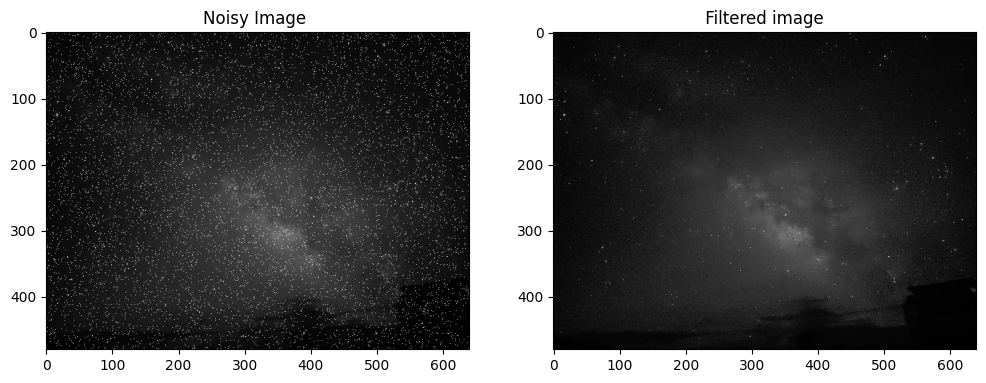

In [15]:
# Compute Average image
filtered_image = np.median(noisy_images, axis=0)

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
fig.add_subplot(121)
plt.title('Noisy Image ')
plt.set_cmap('gray')
plt.imshow(noisy_image)

# show original image on a subplot
fig.add_subplot(122)
plt.title(' Filtered image ')
plt.set_cmap('gray')
plt.imshow(filtered_image)